# Load Clean Dataset

This project utilizes data from The Ultimate 1 Million Movies Dataset (TMDB + IMDb) available on Kaggle to uncover key patterns and insights.

Link: https://www.kaggle.com/datasets/alanvourch/tmdb-movies-daily-updates

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/My Drive/Dataset/cleaned_movies.csv'
df = pd.read_csv(file_path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11960 entries, 0 to 11959
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       11960 non-null  int64  
 1   title                    11960 non-null  object 
 2   vote_average             11960 non-null  float64
 3   vote_count               11960 non-null  float64
 4   status                   11960 non-null  object 
 5   release_date             11960 non-null  object 
 6   revenue                  11960 non-null  float64
 7   runtime                  11960 non-null  float64
 8   budget                   11960 non-null  float64
 9   imdb_id                  11960 non-null  object 
 10  original_language        11960 non-null  object 
 11  original_title           11960 non-null  object 
 12  overview                 11845 non-null  object 
 13  popularity               11960 non-null  float64
 14  tagline               

In [ ]:
df.head()

id           title  vote_average  vote_count    status release_date  \
0   5      Four Rooms         5.900      2685.0  Released   1995-12-09   
1   6  Judgment Night         6.458       349.0  Released   1993-10-15   
2  11       Star Wars         8.203     21063.0  Released   1977-05-25   
3  12    Finding Nemo         7.817     19556.0  Released   2003-05-30   
4  13    Forrest Gump         8.468     28101.0  Released   1994-06-23   

       revenue  runtime      budget    imdb_id  ...  \
0    4257354.0     98.0   4000000.0  tt0113101  ...   
1   12136938.0    109.0  21000000.0  tt0107286  ...   
2  775398007.0    121.0  11000000.0  tt0076759  ...   
3  940335536.0    100.0  94000000.0  tt0266543  ...   
4  677387716.0    142.0  55000000.0  tt0109830  ...   

                                                cast  \
0  Tamlyn Tomita, Tim Roth, Madonna, Paul Caldero...   
1  Stephen Dorff, Deirdre Kelly, Emilio Estevez, ...   
2  William Hootkins, Scott Beach, Phil Brown, Mar...   
3  Albert Brooks, Bob Bergen, Bobby Block, Ellen ...   
4  John Lennon, Christopher James Hall, Hanna Hal...   

                                            director  \
0  Robert Rodriguez, Quentin Tarantino, Alexandre...   
1                                    Stephen Hopkins   
2                                       George Lucas   
3                                     Andrew Stanton   
4                                    Robert Zemeckis   

                             director_of_photography  \
0  Andrzej Sekula, Rodrigo García, Phil Parmet, G...   
1                                         Peter Levy   
2                                     Gilbert Taylor   
3                       Sharon Calahan, Jeremy Lasky   
4                                        Don Burgess   

                                             writers  \
0  Robert Rodriguez, Quentin Tarantino, Alexandre...   
1                      Lewis Colick, Jere Cunningham   
2                                       George Lucas   
3  Blake Tucker, Bob Peterson, David Reynolds, Ad...   
4                           Winston Groom, Eric Roth   

                                           producers      music_composer  \
0  Lawrence Bender, Quentin Tarantino, Alexandre ...  Combustible Edison   
1              Marilyn Vance, Gene Levy, Lloyd Segan      Alan Silvestri   
2            Rick McCallum, Gary Kurtz, George Lucas       John Williams   
3                      John Lasseter, Graham Walters       Thomas Newman   
4         Steve Starkey, Steve Tisch, Wendy Finerman      Alan Silvestri   

  imdb_rating imdb_votes                       poster_path release_year  
0         6.7   113964.0  /75aHn1NOYXh4M7L5shoeQ6NGykP.jpg         1995  
1         6.6    19857.0  /3rvvpS9YPM5HB2f4HYiNiJVtdam.jpg         1993  
2         8.6  1503070.0  /6FfCtAuVAW8XJjZ7eWeLibRLWTw.jpg         1977  
3         8.2  1156681.0  /eHuGQ10FUzK1mdOY69wF5pGgEf5.jpg         2003  
4         8.8  2370858.0  /arw2vcBveWOVZr6pxd9XTd1TdQa.jpg         1994  

[5 rows x 29 columns]

In [ ]:
from collections import Counter

#Show All Genres
df["genres"] = df["genres"].str.split(", ")
all_genres = set(genre for sublist in df["genres"] for genre in sublist)
print("Genres: ")
print(sorted(all_genres))

#Show Count of All Genre
genre_counter = Counter(genre for sublist in df["genres"] for genre in sublist)
print("Number of each Genres:")
print(genre_counter.most_common())

Genres: 
['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']
Number of each Genres:
[('Drama', 5775), ('Comedy', 4301), ('Thriller', 2823), ('Action', 2734), ('Romance', 2274), ('Adventure', 1947), ('Crime', 1804), ('Horror', 1396), ('Family', 1197), ('Science Fiction', 1134), ('Fantasy', 1099), ('Mystery', 953), ('Animation', 692), ('History', 653), ('Music', 492), ('War', 448), ('Documentary', 225), ('Western', 200), ('TV Movie', 29)]


# Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

# --------------------------------------------------------------------------------
# 1. Multi-hot Encoding for `genres`
df['genres'] = df['genres'].fillna('')
df['genres_list'] = df['genres'].apply(lambda x: [genre.strip() for genre in str(x).split(',') if genre.strip()])
all_genres = sorted(set(genre for genres in df['genres_list'] for genre in genres))
for genre in all_genres:
    df[f'genre_{genre}'] = df['genres_list'].apply(lambda x: int(genre in x))

# --------------------------------------------------------------------------------
# 2. release_year → decade
df['decade'] = (df['release_year'] // 10) * 10
df['decade_encoded'] = LabelEncoder().fit_transform(df['decade'])

# --------------------------------------------------------------------------------
# 3. original_language → Label Encoding / Top Languages only
top_languages = df['original_language'].value_counts().nlargest(10).index
df['original_language'] = df['original_language'].where(df['original_language'].isin(top_languages), 'other')
lang_encoder = LabelEncoder()
df['original_language_encoded'] = lang_encoder.fit_transform(df['original_language'])

# --------------------------------------------------------------------------------
# 4. director, writers, producer → Frequency Encoding
for col in ['director', 'writers', 'producers']:
    freq = df[col].value_counts()
    df[f'{col}_freq'] = df[col].map(freq)
    df[f'{col}_freq'] = df[f'{col}_freq'].fillna(0)

# --------------------------------------------------------------------------------
# 5. Fill or Scale runtime, imdb_rating, imdb_votes
num_cols = ['runtime', 'imdb_rating', 'imdb_votes']
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

scaler = StandardScaler()
df[[f'{col}_scaled' for col in num_cols]] = scaler.fit_transform(df[num_cols])


# --------------------------------------------------------------------------------
# Summary of final features
selected_features = [
    col for col in df.columns
    if (
        col.startswith('genre_')
        or col in ['release_year', 'decade',
                   'original_language_encoded',
                   'director_freq',
                   'writers_freq',
                   'producers_freq']
        or col.endswith('_scaled')
    )
]

X = df[selected_features]
print(X.head())

   release_year  genre_Action  genre_Adventure  genre_Animation  genre_Comedy  \
0          1995             0                0                0             1   
1          1993             1                0                0             0   
2          1977             1                1                0             0   
3          2003             0                0                1             0   
4          1994             0                0                0             1   

   genre_Crime  genre_Documentary  genre_Drama  genre_Family  genre_Fantasy  \
0            1                  0            0             0              0   
1            1                  0            0             0              0   
2            0                  0            0             0              0   
3            0                  0            0             1              0   
4            0                  0            1             0              0   

   ...  genre_War  genre_Western  deca

In [ ]:
df.head(5)

id           title  vote_average  vote_count    status release_date  \
0   5      Four Rooms         5.900      2685.0  Released   1995-12-09   
1   6  Judgment Night         6.458       349.0  Released   1993-10-15   
2  11       Star Wars         8.203     21063.0  Released   1977-05-25   
3  12    Finding Nemo         7.817     19556.0  Released   2003-05-30   
4  13    Forrest Gump         8.468     28101.0  Released   1994-06-23   

       revenue  runtime      budget    imdb_id  ... genre_Western decade  \
0    4257354.0     98.0   4000000.0  tt0113101  ...             0   1990   
1   12136938.0    109.0  21000000.0  tt0107286  ...             0   1990   
2  775398007.0    121.0  11000000.0  tt0076759  ...             0   1970   
3  940335536.0    100.0  94000000.0  tt0266543  ...             0   2000   
4  677387716.0    142.0  55000000.0  tt0109830  ...             0   1990   

  decade_encoded  original_language_encoded director_freq writers_freq  \
0              8                          0             1            1   
1              8                          0             9            1   
2              6                          0             6            3   
3              9                          0             4            1   
4              8                          0            19            1   

  producers_freq runtime_scaled imdb_rating_scaled imdb_votes_scaled  
0            1.0      -0.305308           0.311087          0.197790  
1            1.0       0.074889           0.223009         -0.339608  
2            1.0       0.489651           1.984576          8.130279  
3            1.0      -0.236182           1.632262          6.152225  
4            1.0       1.215483           2.160732         13.085782  

[5 rows x 58 columns]

**Check Feature Important using ML**


Feature Importances - Feature Importance for Budget
                  Feature  Importance
original_language_encoded    0.329409
               popularity    0.168729
             release_year    0.158570
           runtime_scaled    0.149872
            director_freq    0.113626
           producers_freq    0.079793
                   decade    0.000000


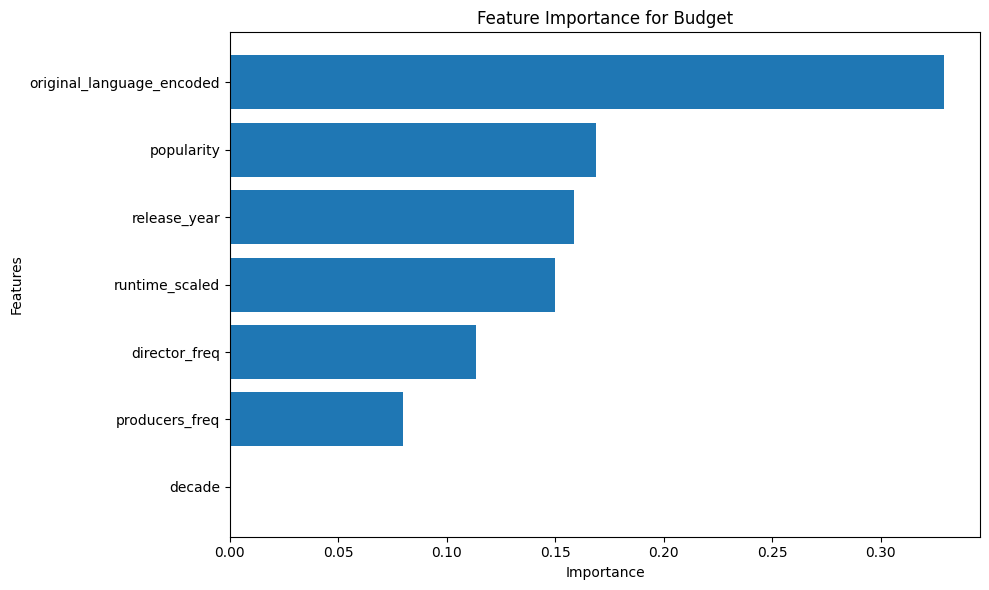


Feature Importances - Feature Importance for Revenue
                  Feature  Importance
                   budget    0.451970
               imdb_votes    0.196872
original_language_encoded    0.083432
               popularity    0.079363
             release_year    0.055579
              imdb_rating    0.044693
           runtime_scaled    0.039580
           producers_freq    0.027724
            director_freq    0.020787
                   decade    0.000000


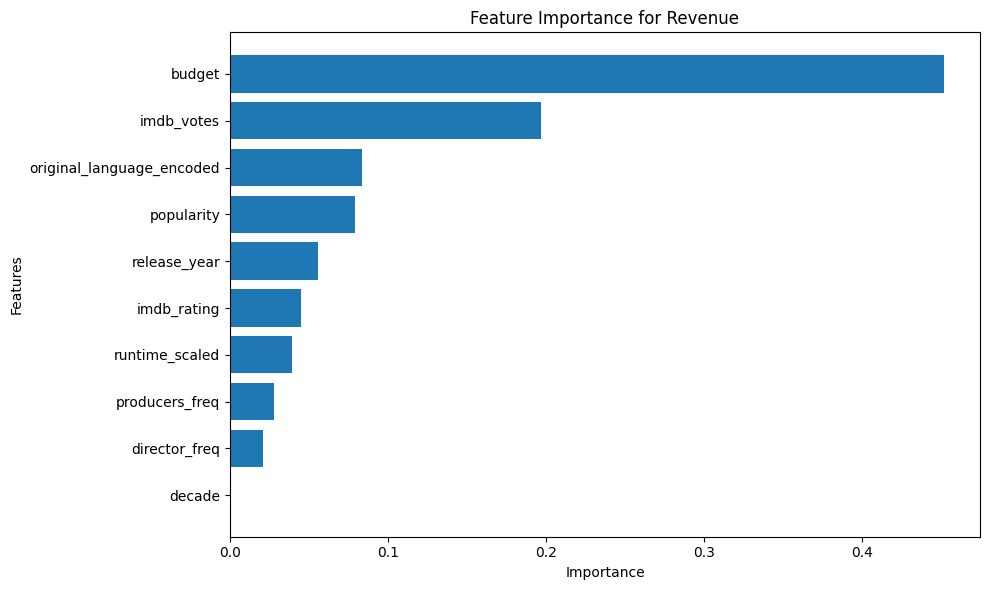

In [ ]:
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

featuresA = ['director_freq', 'producers_freq', 'original_language_encoded', 'runtime_scaled', 'release_year', 'decade', 'popularity']
featuresB = featuresA + ['budget', 'imdb_votes', 'imdb_rating']

# Target A: budget
X_budget = df[featuresA]
y_budget = df['budget']

# Target B: profit
X_revenue = df[featuresB]
y_revenue = df['revenue']

# --------------------------------------------------------------------------------
#Train Model & Check Feature Importance
def feature_importance(X, y, title):
    model = XGBRegressor(n_estimators=100, random_state=42)
    model.fit(X, y)

    # Calculate importances
    importance = model.feature_importances_
    feature_names = X.columns

    # Create a DataFrame for display
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance
    }).sort_values(by='Importance', ascending=False)

    # Print the values
    print(f"\nFeature Importances - {title}")
    print(importance_df.to_string(index=False))

    # Plot
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'], importance_df['Importance'])
    plt.title(title)
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.gca().invert_yaxis()  # Most important on top
    plt.tight_layout()
    plt.show()

# A: Predict Budget
feature_importance(X_budget, y_budget, "Feature Importance for Budget")

# B: Predict Revenue
feature_importance(X_revenue, y_revenue, "Feature Importance for Revenue")

According to above graph,

Budget:
*   original_language_encoded 0.33 = Language may indicate target market or budget
*   popularity 0.17 : Previously popular films may have higher budgets
*   release_year 0.16 : Era affects cost (e.g. modern CGI is expensive)
*   runtime_scaled 0.15 : Feature films tend to have higher budgets
*   director_freq 0.11 : Famous directors may have higher budgets
*   producers_freq 0.08 : Producers may have influence over budget
*   decade 0.00 : Not applicable in this model because release_year is more detailed


Revenue:
*   budget 0.45 : Initial capital is the main factor
*   imdb_votes 0.20 : Popularity = good revenue
*   original_language_encoded 0.08 : Language may affect the market
*   popularity 0.08 : Famous movies will make good revenue
*   release_year 0.05 : Era has a small effect
*   imdb_rating 0.04 : Movie quality has some effect
*   runtime_scaled 0.04 : Longer run times may have fewer showtimes
*   producers_freq 0.03 : Very little effect on revenue
*   director_freq 0.02 : Much less than budget
*   decade 0.00 : Doesn't help


To conclude,
*   Budget depends on language, popularity, runtime, release_year, director, producer
*   Revenue depends on budget, votes, popularity, rating

# Exploratory Data Analysis (EDA)

**Monthly Movie Grossing Trends by Year (2010 - 2025)**

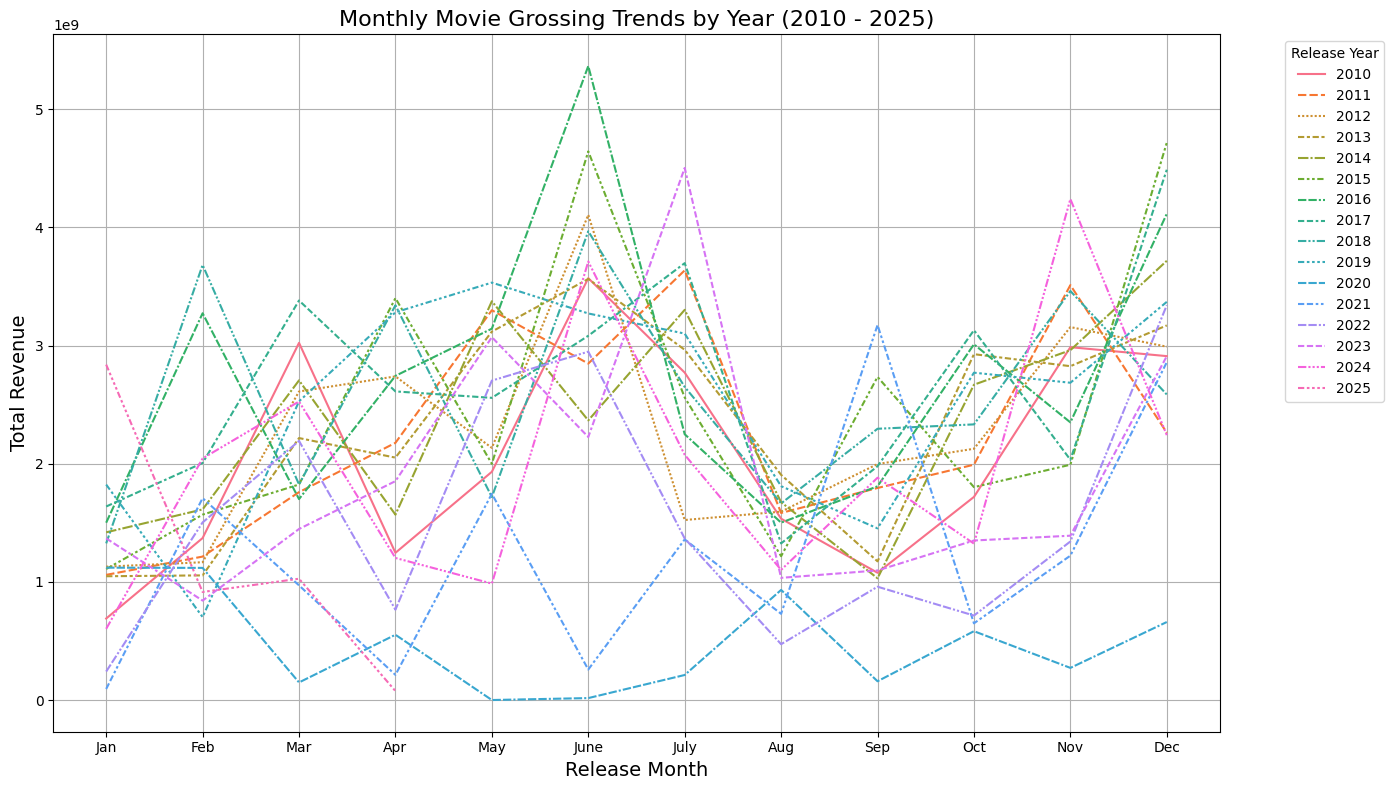

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Extract year and month
df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month

# Filter only years
df_filtered = df[df['release_year'] >= 2010]

# Group by year and month
monthly_revenue = df_filtered.groupby(['release_year', 'release_month'])['revenue'].sum().reset_index()

# Pivot for line plot
monthly_pivot = monthly_revenue.pivot(index='release_month', columns='release_year', values='revenue')

# Plot
plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_pivot)
plt.title('Monthly Movie Grossing Trends by Year (2010 - 2025)', fontsize=16)
plt.xlabel('Release Month', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)
plt.xticks(ticks=range(1,13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'June',
    'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.grid(True)
plt.legend(title='Release Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Annual Genre Revenue Analysis**

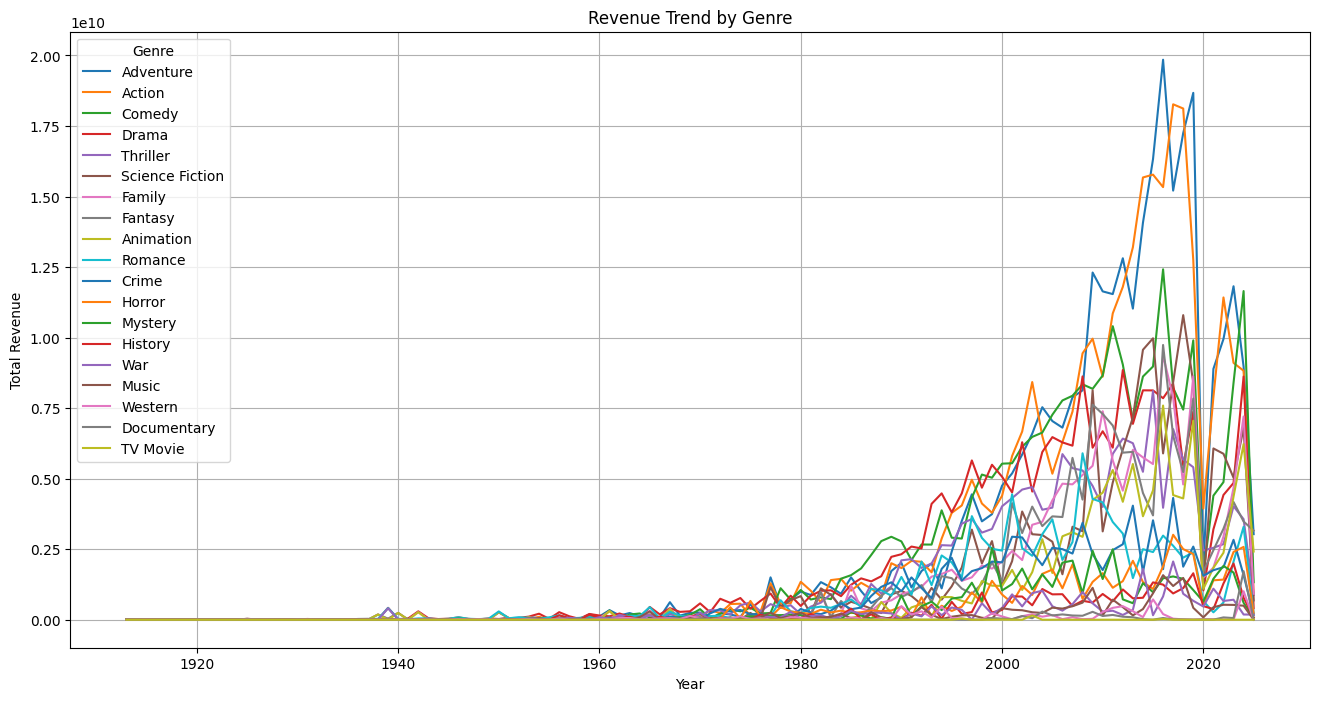

In [ ]:
# Melt genres into vertical format
genre_cols = [col for col in df.columns if col.startswith('genre_')]

df_genre = df.melt(
id_vars=['release_year', 'revenue'],
value_vars=genre_cols,
var_name='genre',
value_name='is_genre'
)

# Only take rows where the movie actually has a genre
df_genre = df_genre[df_genre['is_genre'] > 0.5]

# Group by year and Genre, then sum revenue
revenue_by_genre_year = df_genre.groupby(['release_year', 'genre'])['revenue'].sum().reset_index()
revenue_by_genre_year['genre'] = revenue_by_genre_year['genre'].str.replace('genre_', '')

# Pivot Table for Plot
pivot_table = revenue_by_genre_year.pivot(index='release_year', columns='genre', values='revenue').fillna(0)

# Plot Line Chart
top_genres = pivot_table.sum().sort_values(ascending=False).index

pivot_table[top_genres].plot(figsize=(16,8))
plt.title('Revenue Trend by Genre')
plt.ylabel('Total Revenue')
plt.xlabel('Year')
plt.legend(title='Genre')
plt.grid(True)
plt.show()

**Revenue Trend Analysis by Genre Summary:**
1. Revenue trend overview
  *   Since 1980, revenue from movies in all genres has been increasing continuously.
  *   The peak was in 2010–2020, when movie revenue exceeded tens of billions of dollars per year.
  *   After 2020, revenue from all genres fell rapidly (probably due to COVID-19).
2. Genres with the highest revenue From a graph line that is clearly higher than other lines:
  *   Action: This genre is clearly leading, especially blockbuster movies (Marvel, Fast & Furious, etc.)
  *   Adventure, and Adventure
  *   Science Fiction, and Sci-Fi
  *   Comedy and Drama still have good revenue, followed by
3. Genres with medium to low revenue
  *   Family, Fantasy, Animation:  still have good income consistently
  *   Horror, Thriller, Romance: Lower income, but Horror genre is interesting because it uses low budget but has good profit
  *   Documentary, TV Movie, Western: Low income and relatively stable (not much up and down)

**Analyze Budget / Revenue / ROI per Genre**

In [ ]:
# Prepare data in long format
genre_cols = [col for col in df.columns if col.startswith('genre_')]

df_genre_long = df.melt(
id_vars=['id', 'title', 'budget', 'revenue', 'imdb_rating', 'release_date', 'release_year'],
value_vars=genre_cols,
var_name='genre',
value_name='has_genre'
)

# Filter only real genres
df_genre_long = df_genre_long[df_genre_long['has_genre'] == 1]

# Make genres prettier
df_genre_long['genre'] = df_genre_long['genre'].str.replace('genre_', '')

# Calculate ROI
df_genre_long['roi'] = (df_genre_long['revenue'] - df_genre_long['budget']) / df_genre_long['budget']

# Summarize averages by genre
genre_investment = df_genre_long.groupby('genre').agg({
'budget': 'mean',
'revenue': 'mean',
'roi': 'mean'
}).reset_index()

# Sort by ROI
genre_investment = genre_investment.sort_values(by='roi', ascending=False)

print(genre_investment)

              genre        budget       revenue           roi
5       Documentary  2.793912e+06  1.811797e+07  1.504675e+06
13          Romance  1.554325e+07  4.391637e+07  1.493464e+05
3            Comedy  2.058804e+07  5.799907e+07  7.959964e+04
6             Drama  1.595162e+07  3.803968e+07  5.913202e+04
11            Music  1.389584e+07  3.708457e+07  4.998495e+03
4             Crime  2.075265e+07  4.751104e+07  1.887998e+03
1         Adventure  5.163529e+07  1.585340e+08  1.852520e+03
0            Action  4.028767e+07  1.104855e+08  1.771165e+03
16         Thriller  2.327311e+07  5.664260e+07  1.208220e+03
8           Fantasy  4.426037e+07  1.285161e+08  4.140129e+02
14  Science Fiction  4.700827e+07  1.378355e+08  2.274853e+02
7            Family  3.953879e+07  1.212499e+08  1.183311e+02
17              War  2.378272e+07  5.347301e+07  1.008652e+02
15         TV Movie  2.376333e+06  7.998139e+06  1.489010e+01
10           Horror  1.234663e+07  3.585294e+07  1.307208e+01
12      

**Barplot: Average ROI per Genre**

<ipython-input-75-2b021c141a5e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_investment, x='roi', y='genre', palette='coolwarm')


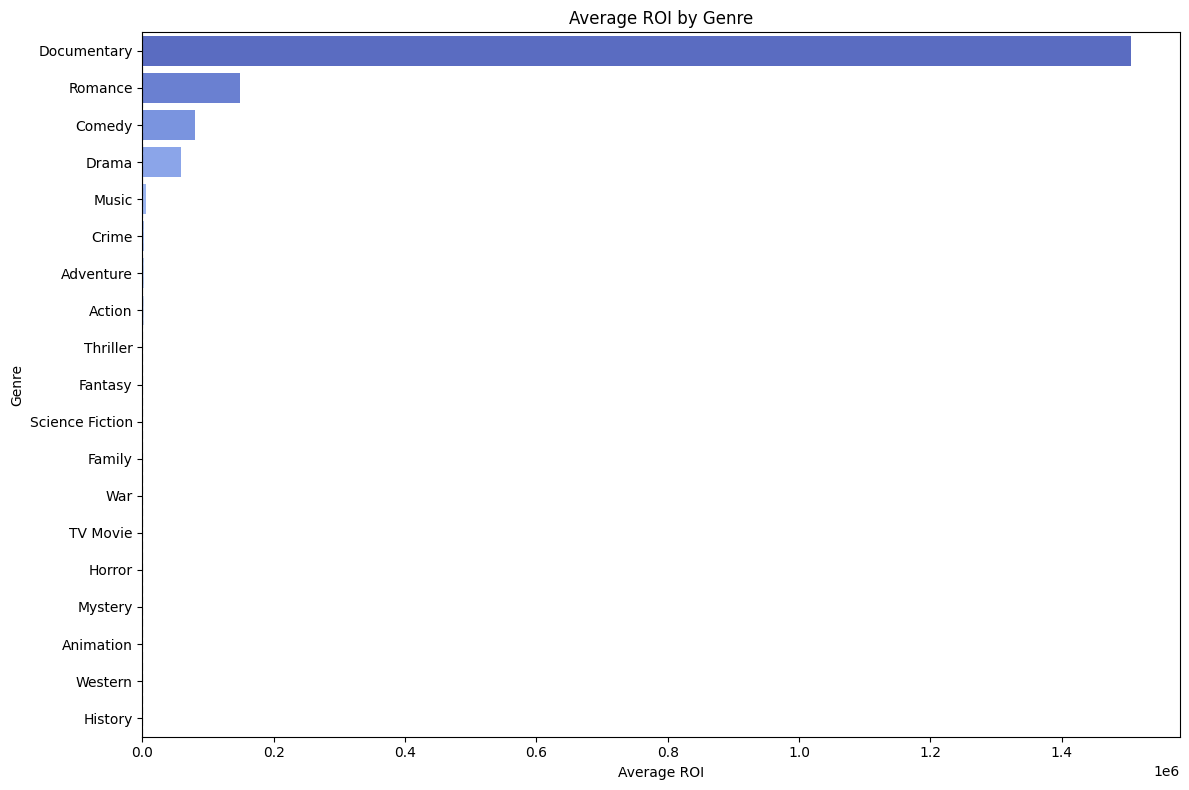

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(data=genre_investment, x='roi', y='genre', palette='coolwarm')
plt.title('Average ROI by Genre')
plt.xlabel('Average ROI')
plt.ylabel('Genre')
plt.axvline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()

**Scatter Plot: Budget vs Revenue by Genre**

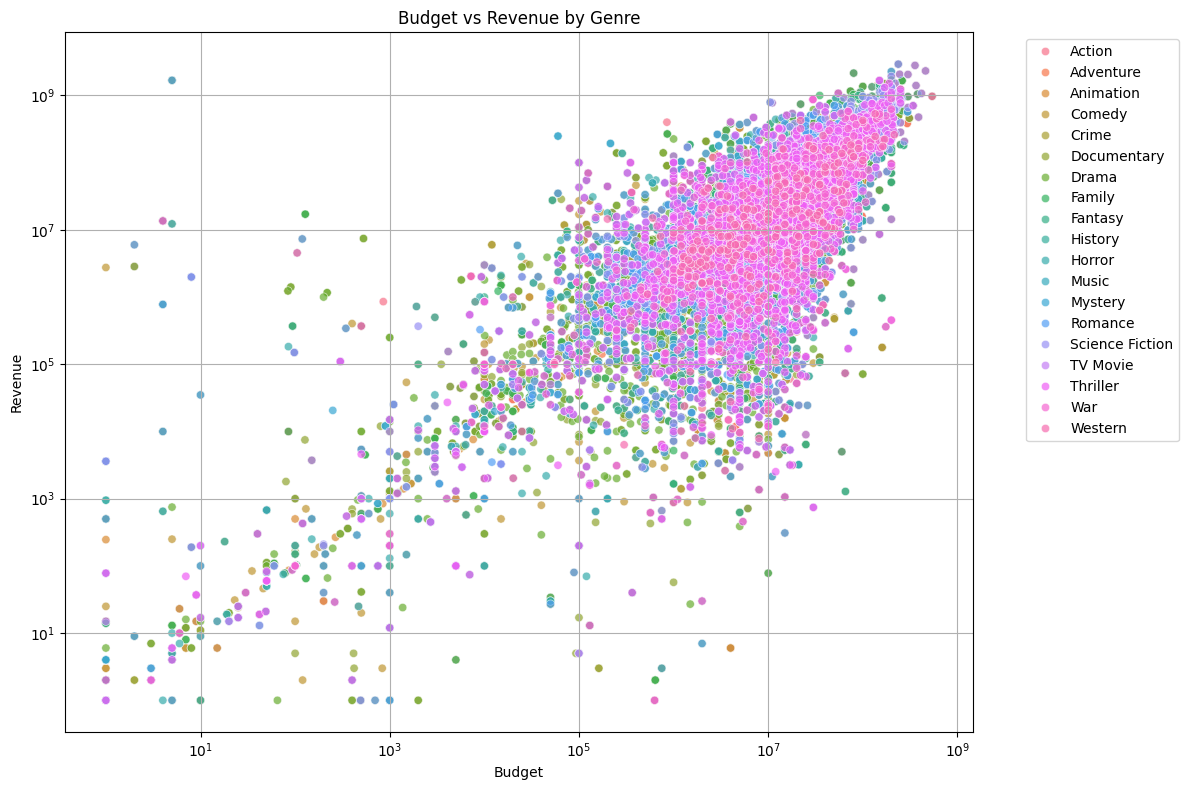

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_genre_long, x='budget', y='revenue', hue='genre', alpha=0.7)
plt.title('Budget vs Revenue by Genre')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.tight_layout()
plt.show()

**Budget, Revenue, and ROI per Genre Analysis Summary:**
*   **High ROI Genres:** Documentary, and Romance
    - Documentary has the highest ROI, at approximately 1.5 million, indicating that the budget is very low relative to the revenue generated. This suggests that documentaries can be highly profitable with relatively small investments.
    - Romance also shows a strong ROI of about 149,346, indicating good profitability, but not as high as documentaries.

*   **Genres with Moderate ROI:** Comedy, Drama, and Music
   - Fall into this category with moderate ROIs
   - These genres appear to have relatively strong returns,  but not as exceptionally high as documentaries or romance.

*   **Genres with Low ROI:** Crime, Adventure, and Action
    - Show low ROIs, with values around 1,000 to 2,000
    - These genres may have larger budgets and revenues, but they don’t offer as much return on investment compared to genres like Documentary or Romance.

*   **Other Genres with Very Low ROI:** Thriller, Fantasy, Science Fiction, and Family
    - Show ROIs in the range of 100 to 400
    - These genres appear to be much less profitable in terms of return on investment.

*   **Genres with Negligible ROI:** War, TV Movie, Horror, Mystery, Animation, Western, and History
    -  Show very low ROIs, mostly under 50 or even lower
    - These genres show significantly poor returns, suggesting that either the budget is too high for the returns or the genre may not be as popular among audiences.

**Top 5 Genres per Year by Revenue**

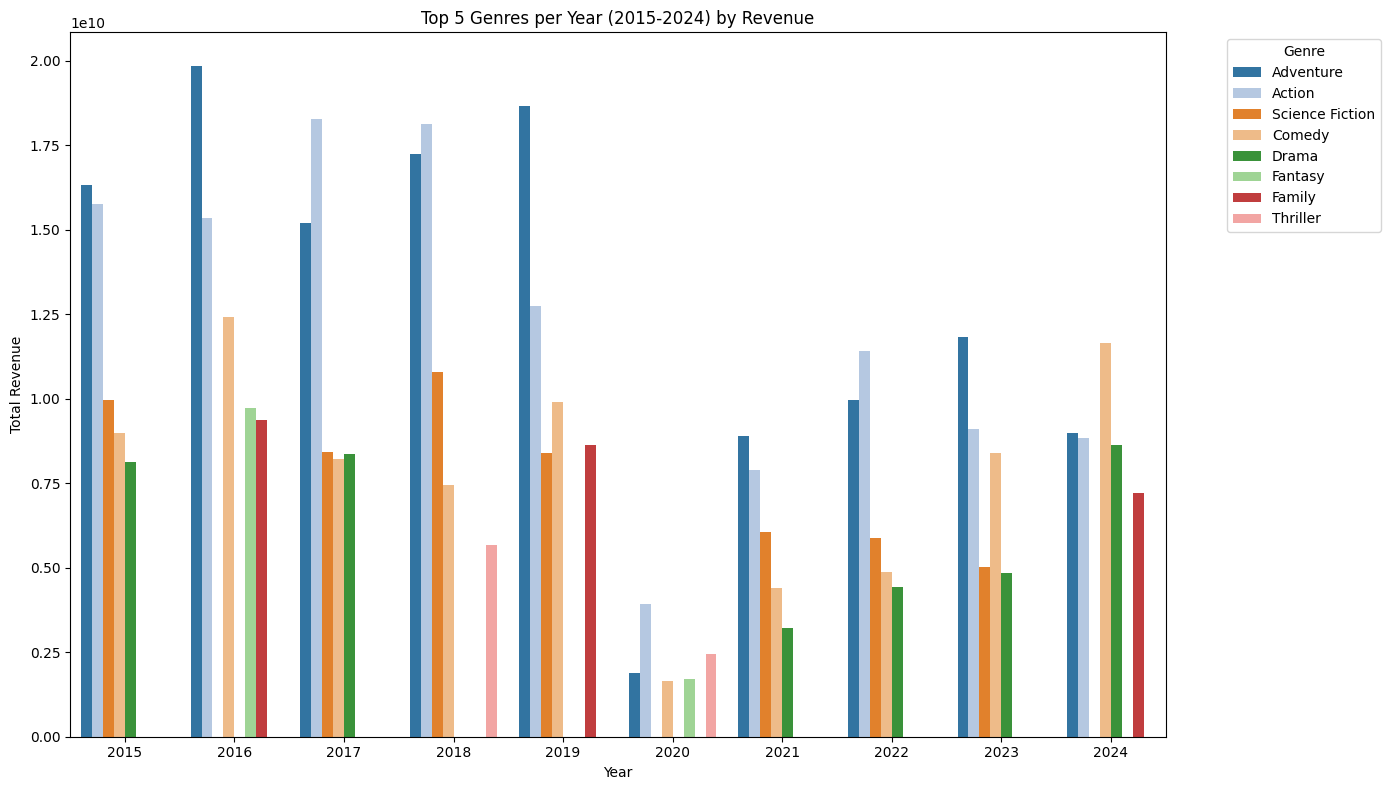

In [ ]:
# Summarize total revenue by year and genre
genre_year_revenue = (
df_genre_long
.groupby(['release_year', 'genre'])['revenue']
.sum()
.reset_index()
)

# Find the Top 5 genres of each year
top5_genre_per_year = (
genre_year_revenue
.sort_values(['release_year', 'revenue'], ascending=[True, False])
.groupby('release_year')
.head(5)
)

# Filter data for the years 2015-2024
selected_years = range(2015, 2025)
filtered_data = top5_genre_per_year[top5_genre_per_year['release_year'].isin(selected_years)]

# Plot Barplot for Top 5 Genres per Year (2015-2024)
plt.figure(figsize=(14, 8))
sns.barplot(data=filtered_data, x='release_year', y='revenue', hue='genre', dodge=True, palette='tab20')
plt.title('Top 5 Genres per Year (2015-2024) by Revenue')
plt.ylabel('Total Revenue')
plt.xlabel('Year')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

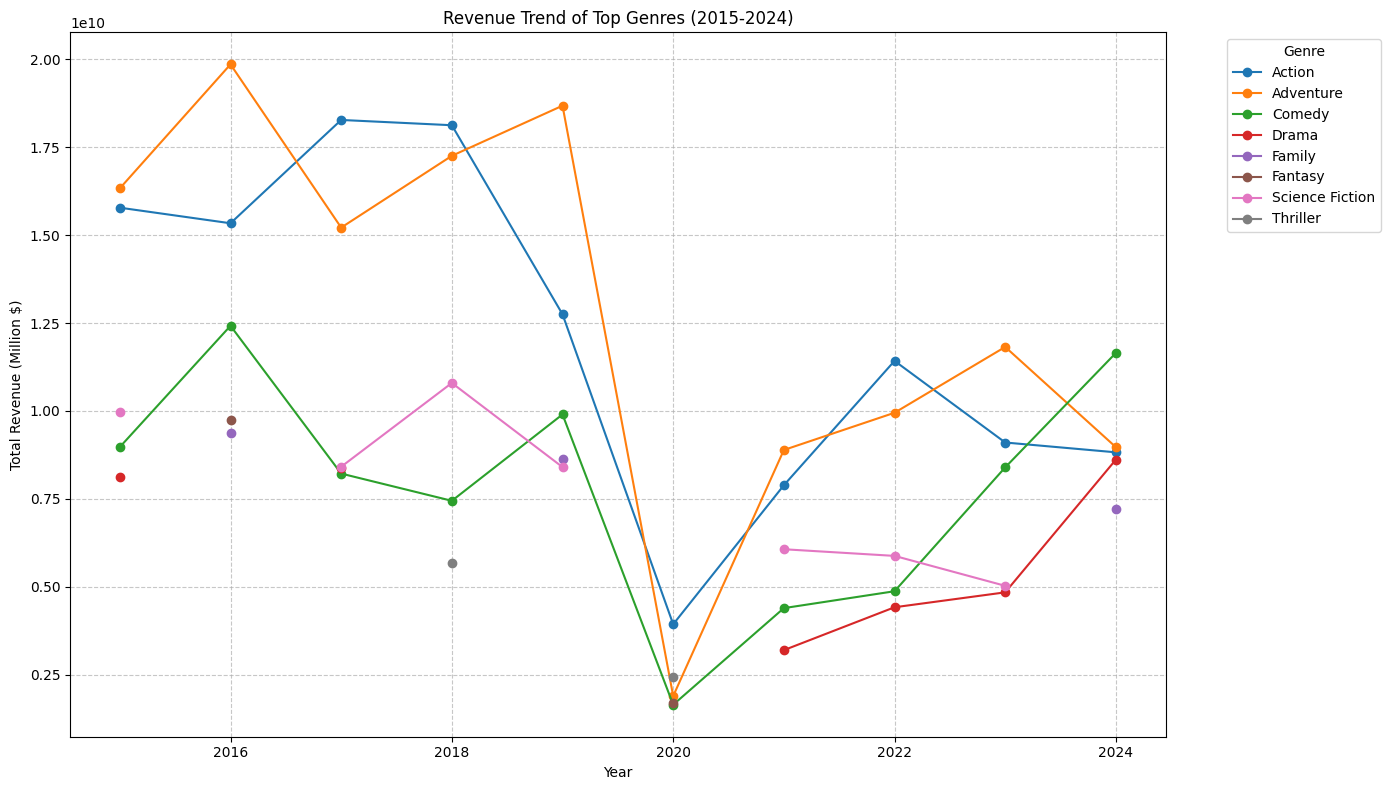

In [ ]:
pivot_data = filtered_data.pivot(index='release_year', columns='genre', values='revenue')

# Plot Line Chart
plt.figure(figsize=(14, 8))
for genre in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[genre], marker='o', label=genre)

plt.title('Revenue Trend of Top Genres (2015-2024)')
plt.xlabel('Year')
plt.ylabel('Total Revenue (Million $)')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Top 5 Genres per Year by Revenue Analysis:**

*   Adventure and Action genres dominate the rankings almost every year
  - Adventure and Action genres almost always alternate between the top 1-2, especially from 2015–2019, when revenues reached tens of billions of dollars.
  - Even in 2020, when revenues were down due to COVID-19 and the cinema crisis, Action genre still held the top spot.

*   Science Fiction is becoming more popular.
  - It has been in the Top 5 for several years, from 2015 to 2023.
  - In particular, in 2018, revenues from Sci-Fi reached $10,796.22 million, which is quite remarkable.

*  Comedy is consistent.
  - Comedy is in the Top 5 almost every year.
  - 2024 is very interesting, because Comedy has jumped to the top spot for the first time in the past decade.

*  Drama has a strong fan base.
  - Although the income is not the highest, Drama is in the Top 5 almost every year with data, such as 2015, 2017, 2021, 2022, 2023, 2024.
  - It is a very stable genre and should have a viewer base that likes to consume intense content.

*  2020: The COVID crisis hit hard.
  - This year, income from all genres has clearly decreased (Action from tens of billions to only 3,939 million).
  - Genres such as Thriller and Fantasy appeared in the Top 5 because many blockbuster movies were postponed.

*  Family and Fantasy had peaks in some years.
  - Family came up in 2016 and 2019.
  - Fantasy was in the Top 5 in 2016 and 2020 when fantasy movies were popular.

# 🎬 Clustering

**Feature & Standize**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# ====================================================================================================================
# Feature
features = [
    'runtime',
    'imdb_rating',
    'imdb_votes',
    'popularity',
    'original_language_encoded',
    'release_year'
]

genre_cols = [col for col in df.columns if col.startswith('genre_')]
features += genre_cols
features += ['producers_freq']

# ====================================================================================================================
# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

**Find the optimal number of Clusters**

Using Silhouette Score

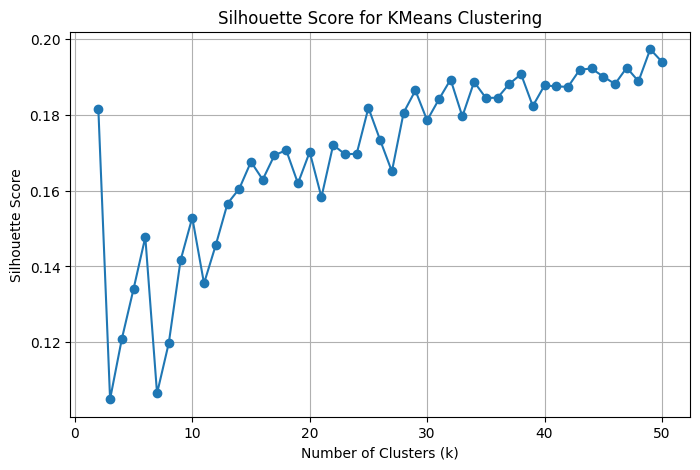

k = 2: Silhouette Score = 0.1816
k = 3: Silhouette Score = 0.1050
k = 4: Silhouette Score = 0.1209
k = 5: Silhouette Score = 0.1341
k = 6: Silhouette Score = 0.1477
k = 7: Silhouette Score = 0.1065
k = 8: Silhouette Score = 0.1198
k = 9: Silhouette Score = 0.1416
k = 10: Silhouette Score = 0.1529
k = 11: Silhouette Score = 0.1355
k = 12: Silhouette Score = 0.1456
k = 13: Silhouette Score = 0.1566
k = 14: Silhouette Score = 0.1605
k = 15: Silhouette Score = 0.1676
k = 16: Silhouette Score = 0.1629
k = 17: Silhouette Score = 0.1693
k = 18: Silhouette Score = 0.1706
k = 19: Silhouette Score = 0.1619
k = 20: Silhouette Score = 0.1702
k = 21: Silhouette Score = 0.1582
k = 22: Silhouette Score = 0.1720
k = 23: Silhouette Score = 0.1696
k = 24: Silhouette Score = 0.1697
k = 25: Silhouette Score = 0.1818
k = 26: Silhouette Score = 0.1733
k = 27: Silhouette Score = 0.1650
k = 28: Silhouette Score = 0.1805
k = 29: Silhouette Score = 0.1864
k = 30: Silhouette Score = 0.1785
k = 31: Silhouette Sco

In [ ]:
import matplotlib.pyplot as plt
sil_scores = []
K = range(2, 51)  # Test k = 2 to 30

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, cluster_labels)
    sil_scores.append(score)

# Plot Silhouette Score Graph
plt.figure(figsize=(8, 5))
plt.plot(K, sil_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for KMeans Clustering')
plt.grid(True)
plt.show()

for k, score in zip(K, sil_scores):
    print(f"k = {k}: Silhouette Score = {score:.4f}")

From Silhouette Scores, all Silhouette Scores are approximately 0.1 – 0.2, we can convey that there're many overlapping clusters.

We decided to not use k = 15 (0.1676)

Reasons
*   The Silhouette Score is quite high and not too high
*   Good Enough + Practical Cluster (k = 10-20)
*   The Highest Silhouette (k = 49) has too many clusters, which may result in:
    - Too few cluster members
    - No real pattern (overfitting)
    - Difficult to use in supervised learning

**Fit KMeans with the optimal number of Clusters**

In [ ]:
chosen_k = 15

kmeans_15 = KMeans(n_clusters=chosen_k, random_state=42, n_init=10)
df['cluster'] = kmeans_15.fit_predict(X_scaled)

#  Seeing Silhouette Score of k = 15
score_15 = silhouette_score(X_scaled, df['cluster'])
print(f"\n Silhouette Score for k = 15: {score_15:.4f}")

# Summary of average Features in each Cluster
cluster_summary = df[['cluster'] + features].groupby('cluster').mean()
print(cluster_summary)


 Silhouette Score for k = 15: 0.1676
            runtime  imdb_rating     imdb_votes  popularity  \
cluster                                                       
0        106.352000     7.061600   59557.608000    4.637097   
1        103.061509     6.145648   52556.568279    4.883780   
2        111.868959     6.650651   50297.983736    4.655223   
3        115.658286     6.344229  297826.308571   14.081902   
4        109.059850     6.502993   40197.379052    4.099244   
5        112.676790     6.222993   79500.308026    5.613786   
6         88.482759     6.241379    5781.000000    3.245103   
7         83.388889     6.457143   91227.455556    8.103257   
8        112.575758     6.699495   73596.818182    5.490014   
9         83.522727     7.210000   10645.568182    2.685487   
10       124.209412     6.796235   92745.068235    5.526859   
11       105.087457     6.342002   88134.482163    5.989648   
12       131.495349     6.909070   67532.634884    5.170341   
13        95.3026

In [ ]:
# Download New Dataset with Clustering
from google.colab import files

df.to_csv('WithClusterFinal.csv', index=False)
files.download('WithClusterFinal.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Insight of each Cluster**

We use PCA to reduce the dimensionality before plotting, to visualize the distribution of the 2D data.

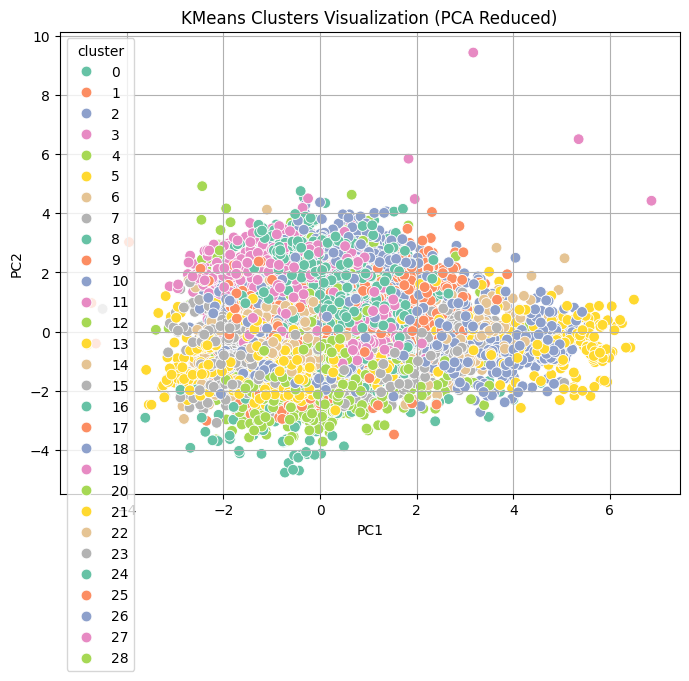

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

# Reduced to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for plotting
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['cluster'] = df['cluster']

# Draw Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cluster', palette='Set2', s=60)
plt.title('KMeans Clusters Visualization (PCA Reduced)')
plt.grid(True)
plt.show()

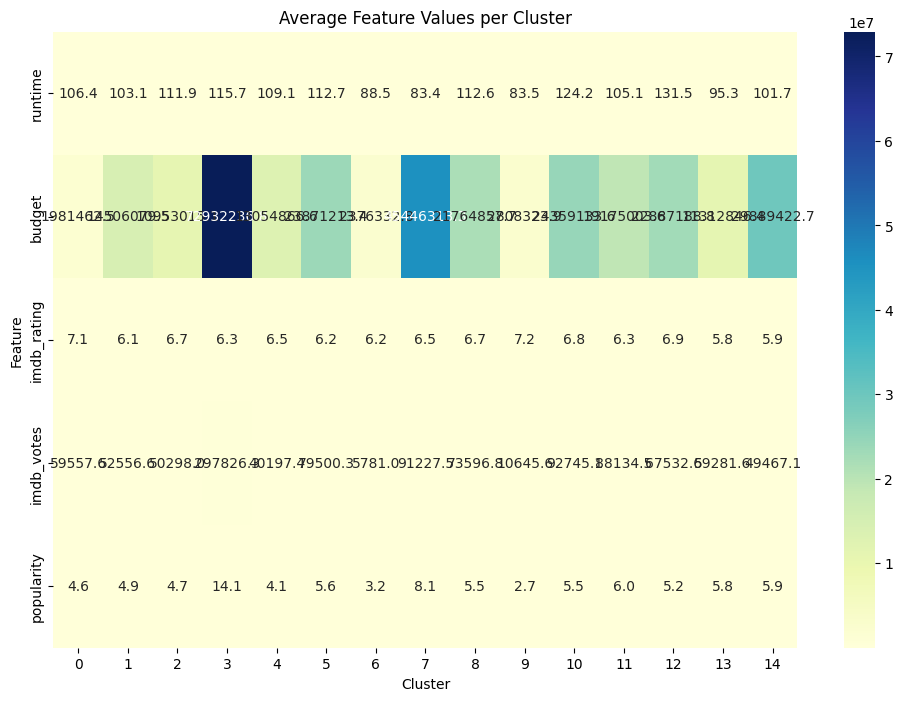

In [ ]:
# Heatmap of Mean Feature Values Per Cluster
selected_features = ['runtime', 'budget', 'imdb_rating', 'imdb_votes', 'popularity']
cluster_means = df.groupby('cluster')[selected_features].mean()

plt.figure(figsize=(12, 8))
sns.heatmap(cluster_means.T, cmap='YlGnBu', annot=True, fmt=".1f")
plt.title("Average Feature Values per Cluster")
plt.ylabel("Feature")
plt.xlabel("Cluster")
plt.show()

In [ ]:
# Print the mean feature values per cluster (before plot)
print("-" * 70)
print("Summary Statistics: Mean Feature Values per Cluster")
print("-" * 70)
print(cluster_means.round(1))
print("-" * 70)

----------------------------------------------------------------------
Summary Statistics: Mean Feature Values per Cluster
----------------------------------------------------------------------
         runtime      budget  imdb_rating  imdb_votes  popularity
cluster                                                          
0          106.4   1981462.5          7.1     59557.6         4.6
1          103.1  14506079.5          6.1     52556.6         4.9
2          111.9  10953015.1          6.7     50298.0         4.7
3          115.7  72932236.8          6.3    297826.3        14.1
4          109.1  13054866.6          6.5     40197.4         4.1
5          112.7  23871213.4          6.2     79500.3         5.6
6           88.5   2376332.8          6.2      5781.0         3.2
7           83.4  45446313.3          6.5     91227.5         8.1
8          112.6  21764857.7          6.7     73596.8         5.5
9           83.5   2808323.9          7.2     10645.6         2.7
10         124

**Average Feature Values per Cluster Annalysis Summary:**
*   Cluster 3:
    - Highest budget, many votes, rising popularity, but medium IMDb rating (6.3)
    - It tends to be Blockbuster or Franchise films.  
*   Cluster 9
    - Low budget, low popularity, but high IMDb rating (7.2)
    - It tends to be Quality films.
*   Cluster 7
    - Medium to high budget, but very short runtime
*   Cluster 12
    - Longest runtime (131 minutes), good IMDb (6.9)
    - It tends to be Serious, long films, Heavy content films.
*   Cluster 13-14
    - Both rating and budget are low
    - It tends to be Unsuccessful/ not famouse films.

<ipython-input-45-bece3589fda1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')


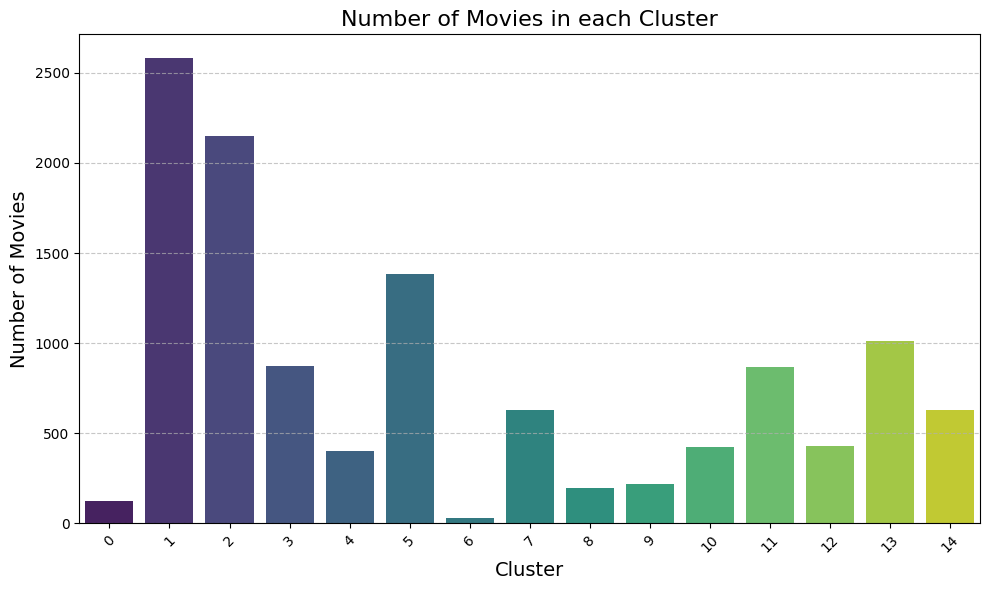

In [ ]:
# Bar chart plot to show the number of movies in each cluster
cluster_counts = df['cluster'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')

plt.title('Number of Movies in each Cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**Number of Movies in each Cluster Analysis Summary:**
*   A cluster with a large number of films, such as clusters 1, 2, 5, 13, may
 indicate a genre that is popular and has a good chance of being profitable.
*   A cluster with a small number of films, such as clusters 6, 8, 9, may be high-risk but can yield high returns if they are market-specific.
*   Investors should consider clusters that have the potential to generate profits from producing films in a variety of genres and that can attract a large audience.

<ipython-input-39-9c03e6ea7673>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_revenue, x='cluster', y='revenue', palette='viridis')


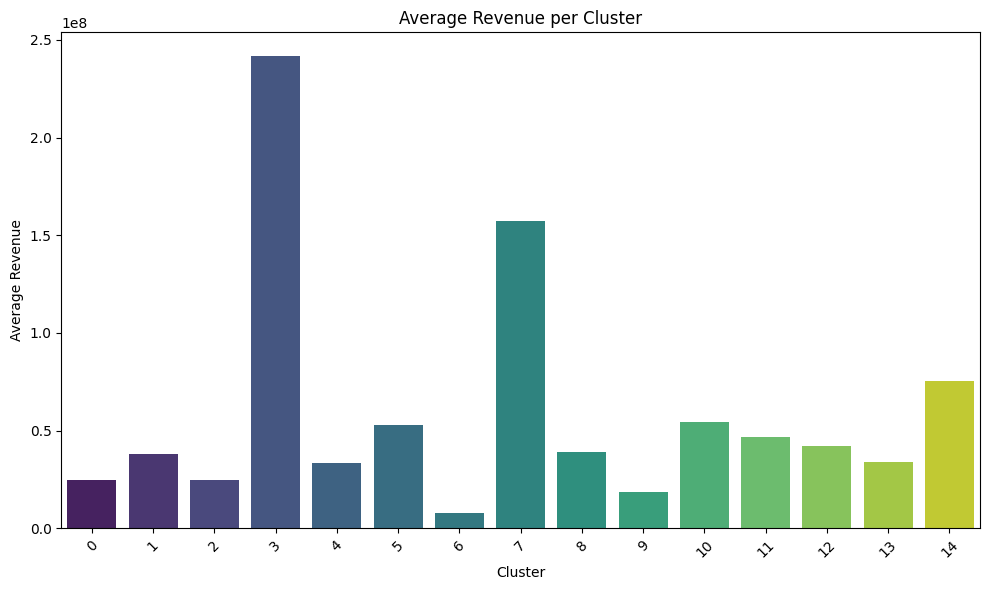

In [ ]:
# Bar Chart: Average Revenue per Cluster
cluster_revenue = df.groupby('cluster')['revenue'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=cluster_revenue, x='cluster', y='revenue', palette='viridis')
plt.title('Average Revenue per Cluster')
plt.ylabel('Average Revenue')
plt.xlabel('Cluster')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Average Revenue Analysis Summary:**
*  **Cluster 3, 7:** High Revenue Clusters. They tend to be action or family movies.
*  **Cluster 14, 10, 5:** Medium Revenue Clusters. They have moderate revenues, showing that while these genres perform decently, they may not always reach the heights of more mainstream or universally appealing genres.
*  **Cluster 6, 9:** Lowest Revenue Clusters. They are common for genres or film styles with smaller budgets and niche audiences.

<ipython-input-42-bfe65cb39d72>:11: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


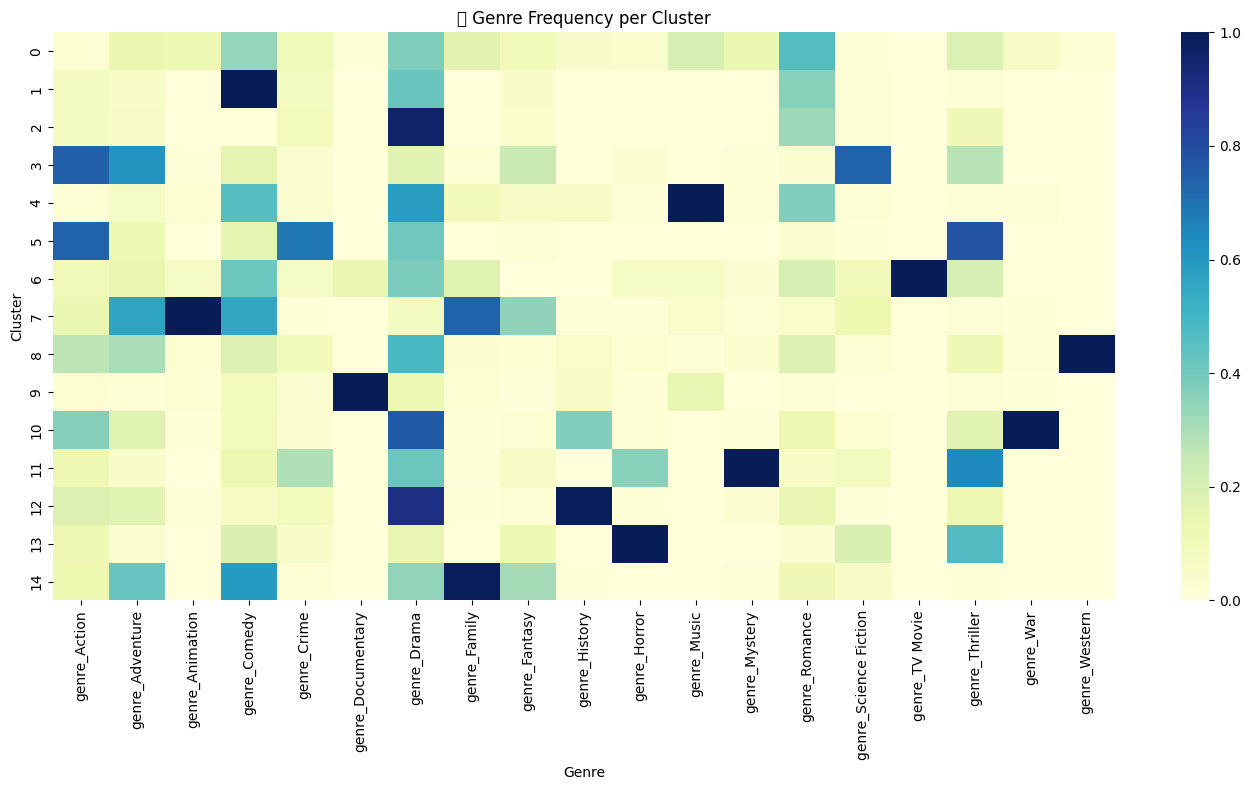

In [ ]:
# Heatmap: Genre Average per Cluster
genre_cols = [col for col in df.columns if col.startswith('genre_')]
cluster_genre_mean = df.groupby('cluster')[genre_cols].mean()

# Heatmap: genre popularity per cluster
plt.figure(figsize=(14, 8))
sns.heatmap(cluster_genre_mean, cmap='YlGnBu', annot=False, cbar=True)
plt.title('🔥 Genre Frequency per Cluster')
plt.xlabel('Genre')
plt.ylabel('Cluster')
plt.tight_layout()
plt.show()

In [ ]:
print("Genre Popularity per Cluster:")
print(cluster_genre_mean)

Genre Popularity per Cluster:
         genre_Action  genre_Adventure  genre_Animation  genre_Comedy  \
cluster                                                                 
0            0.024000         0.136000         0.120000      0.336000   
1            0.075822         0.054932         0.000000      0.996905   
2            0.079926         0.064591         0.000000      0.001859   
3            0.742857         0.612571         0.008000      0.150857   
4            0.022444         0.069825         0.024938      0.458853   
5            0.737527         0.124367         0.001446      0.153290   
6            0.103448         0.137931         0.068966      0.413793   
7            0.136508         0.561905         1.000000      0.547619   
8            0.267677         0.303030         0.025253      0.176768   
9            0.027273         0.018182         0.027273      0.090909   
10           0.367059         0.174118         0.014118      0.089412   
11           0.119678

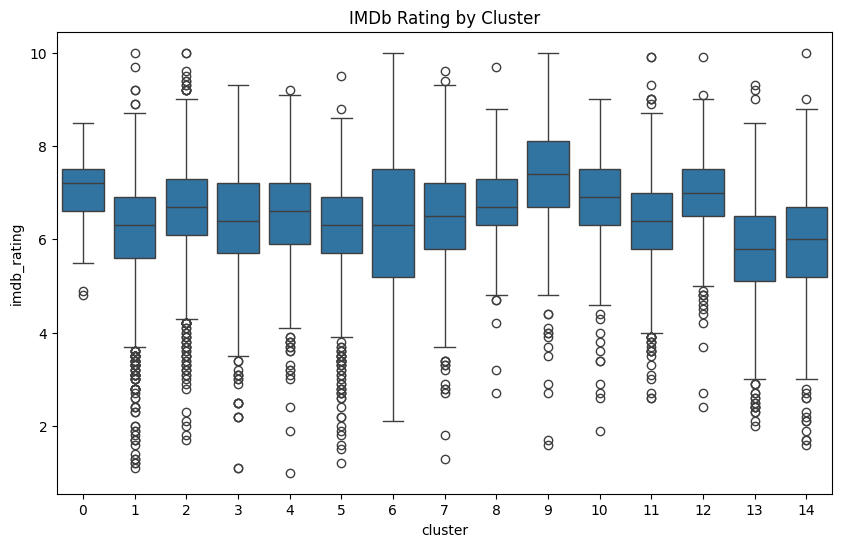

In [ ]:
# Boxplot: Comparing Rating by Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='imdb_rating', data=df)
plt.title('IMDb Rating by Cluster')
plt.show()

In [ ]:
print("-" * 70)
print("Summary Statistics: IMDb Rating per Cluster")
print("-" * 70)

rating_summary = df.groupby('cluster')['imdb_rating'].describe()
print(rating_summary)

----------------------------------------------------------------------
Summary Statistics: IMDb Rating per Cluster
----------------------------------------------------------------------
          count      mean       std  min  25%  50%  75%   max
cluster                                                      
0         125.0  7.061600  0.695235  4.8  6.6  7.2  7.5   8.5
1        2585.0  6.145648  1.100161  1.1  5.6  6.3  6.9  10.0
2        2152.0  6.650651  1.027271  1.7  6.1  6.7  7.3  10.0
3         875.0  6.344229  1.230625  1.1  5.7  6.4  7.2   9.3
4         401.0  6.502993  1.166315  1.0  5.9  6.6  7.2   9.2
5        1383.0  6.222993  1.063460  1.2  5.7  6.3  6.9   9.5
6          29.0  6.241379  1.874741  2.1  5.2  6.3  7.5  10.0
7         630.0  6.457143  1.117588  1.3  5.8  6.5  7.2   9.6
8         198.0  6.699495  0.908979  2.7  6.3  6.7  7.3   9.7
9         220.0  7.210000  1.396143  1.6  6.7  7.4  8.1  10.0
10        425.0  6.796235  0.992607  1.9  6.3  6.9  7.5   9.0
11      

<ipython-input-37-5e289991376b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_rating, x='cluster', y='imdb_rating', palette='coolwarm')


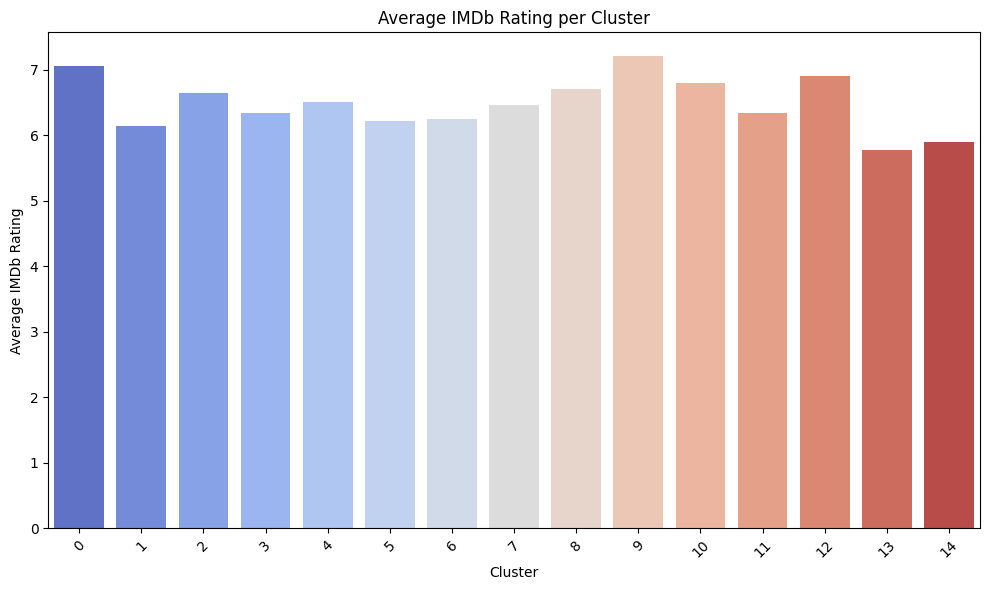

In [ ]:
# Bar Chart: Average IMDb Rating Per Cluster
cluster_rating = df.groupby('cluster')['imdb_rating'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=cluster_rating, x='cluster', y='imdb_rating', palette='coolwarm')
plt.title('Average IMDb Rating per Cluster')
plt.ylabel('Average IMDb Rating')
plt.xlabel('Cluster')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**IMDb Rating Analysis Summary:**
*   **Cluster 9:** Best-received by audiences due to the quality,
*   **Clusters 13, 14:** The lower-scoring  may be tend to focus more on entertainment or violence than on depth of content creation.
*   **Cluster 0, 9, 12:** High Rating (7.0+) High-quality movies, stable score
*   **Cluster 2, 8, 10:** Medium-High (6.6 - 6.9) Good movies, watchable, moderate quality
*   **Clusters 13, 14:** Medium(6.2 - 6.5) General movies
*   **Clusters 1, 13, 14:** Low (5.7 - 6.1) Market/non-mainstream/low-budget. They may be tend to focus more on entertainment or violence than on depth of content creation. movies

<ipython-input-35-325caa02ba37>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_runtime, x='cluster', y='runtime', palette='mako')


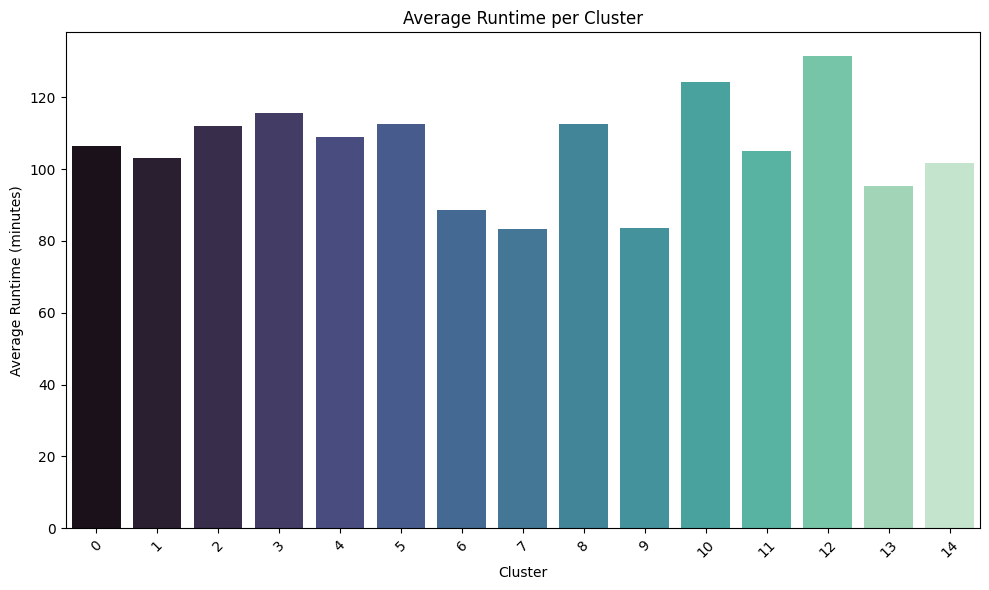

In [ ]:
# Bar Chart: Average Runtime per Cluster
cluster_runtime = df.groupby('cluster')['runtime'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=cluster_runtime, x='cluster', y='runtime', palette='mako')
plt.title('Average Runtime per Cluster')
plt.ylabel('Average Runtime (minutes)')
plt.xlabel('Cluster')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Average Runtime Analysis Summary:**
*   **Cluster 12, 10**: Top 2 Longest runtime, perhaps because it takes time to build emotion or have to tell a detailed historical/war story, it is likely to be a Drama, Biography, or War film.
*   **Cluster 6, 7, 9**: Top 3 Shortest runtime. It may be because they want to reach their audience quickly and use a limited budget. it is likely to be a indie, TV Movie, or Animation film.

****

**Cluster Profiling**

From the analysis of the average values and visualization ​​in each cluster, to name or describe each group.
*    **Cluster 0** - Classics, Romance, Drama
    - Average Year: 1946 (Very Old)
    - IMDb Rating: 7.06 (Above Average)
    - Genre: Romance (46%), Music (20%), Comedy (33%)
    - Language: Very Low (0.048), Most likely English

*    **Cluster 1** - Modern Comedy
    - Average Year: 2002
    - IMDb Rating: Low (6.14)
    - Genre: Comedy (99.7%)
    - Producers freq: Very Low (1.09)

*    **Cluster 2** - Regular Drama
    - Year: 2000

    - Genre: Drama (Very high average, but Comedy ≈ 0)

    - IMDb Rating: Average

    - Features: Drama is the main genre, not very specialized

*    **Cluster 3** - Popular Action-Sci-Fi
    - Year: 2005

    - IMDb Votes: 297K (Very high!)

    - Popularity: 14 (Very high)

    - Genre: Action (74%), Sci-Fi (73%), Adventure (61%)

    - Features: Blockbuster genre Sci-Fi/Action hits

*    **Cluster 4** - Drama + Music 90s
    - Average year: 1993
    - Genre: Music (100%), Drama, Romance

*    **Cluster 5** - Action-Thriller
    - Average year: 2003
    - Genre: Action (73%), Thriller (77%)
    - IMDb Rating: Low (6.2)

*    **Cluster 6** - Short-light TV Movie
    - Runtime: 88 minutes
    - Genre: TV Movie (100%), Comedy, Romance
    - IMDb Votes: Low (5.7k)
    - Fast production, low budget

*    **Cluster 7** - Animation, Adventure
    - Animation (100%), Adventure (56%), Comedy (54%)
    - Year: 2008

*    **Cluster 8** - Classic Drama/Action
    - Average Year: 1983 (Old)
    - Genre: Action, Adventure, Drama
    - Western: 100%
    - Western is most prominent in all clusters

*    **Cluster 9** - Art or Indie Movies
    - IMDb Rating: 7.21 (Very High)
    - Votes: Low (10k)
    - Genres are fairly widespread (Romance, Drama)
    - Quality movies But not popular

*    **Cluster 10** - War/Biography
    - Genre: War (100%), Biography, Drama
    - IMDb Rating: 6.79

*    **Cluster 11** - Mystery/Thriller
    - Mystery (100%), Thriller (64%)
    - IMDb Votes: High (88k)


*    **Cluster 12** - Intense drama
    - Runtime: Longest (131 min)
    - Genre: Drama, Romance
    - IMDb Rating: 6.9

*    **Cluster 13** - Horror
    - Horror (99.9%)
    - IMDb Rating: Low (5.77)

*    **Cluster 14** - Comedy/Action Light
    - Comedy (59%), Action (12%), Romance
    - IMDb Rating: Low (5.89)

In [ ]:
df[['title', 'genres', 'cluster']].head(20)

title  \
0                                          Four Rooms   
1                                      Judgment Night   
2                                           Star Wars   
3                                        Finding Nemo   
4                                        Forrest Gump   
5                                     American Beauty   
6                                        Citizen Kane   
7                                  Dancer in the Dark   
8                                   The Fifth Element   
9                                          Metropolis   
10                                 My Life Without Me   
11  Pirates of the Caribbean: The Curse of the Bla...   
12                                  Kill Bill: Vol. 1   
13                                            Jarhead   
14                                      Walk on Water   
15                                            9 Songs   
16                                     Apocalypse Now   
17                                         Unforgiven   
18                                 The Simpsons Movie   
19              Eternal Sunshine of the Spotless Mind   

                                genres  cluster  
0                        Comedy, Crime        1  
1              Action, Crime, Thriller        5  
2   Adventure, Action, Science Fiction        3  
3                    Animation, Family        7  
4               Comedy, Drama, Romance        3  
5                                Drama        3  
6                       Mystery, Drama       11  
7                         Drama, Crime        2  
8   Science Fiction, Action, Adventure        3  
9               Drama, Science Fiction        2  
10                      Drama, Romance        2  
11          Adventure, Fantasy, Action        3  
12                       Action, Crime        3  
13                          Drama, War       10  
14                               Drama        2  
15               Drama, Music, Romance        4  
16                          Drama, War       10  
17                             Western        8  
18           Animation, Comedy, Family        7  
19     Science Fiction, Drama, Romance        3

There are some movies in the wrong cluster.

The possible reason from our analysis is because the features used are not enough/not appropriate, such as budget, votes, and popularity, which are numerical and have a strong effect. It may overshadow the genre. But we had to use these features because they affect a lot in movies.

# 🍿 Revenue Prediction

In [ ]:
import pandas as pd
import numpy as np
import optuna
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from catboost import CatBoostRegressor
import joblib
from google.colab import files

# --------------------------------------------------------------------------------
# Feature Engineering
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_month'] = df['release_date'].dt.month.fillna(0).astype(int)
df['is_holiday_season'] = df['release_month'].isin([11, 12, 1]).astype(int)
df['is_summer_release'] = df['release_month'].isin([5, 6, 7, 8]).astype(int)
df['budget_log'] = np.log1p(df['budget'])

# --------------------------------------------------------------------------------
# Features
genre_cols = [col for col in df.columns if col.startswith('genre_')]

features = [
    'budget_log',
    'imdb_votes',
    'original_language_encoded',
    'popularity',
    'release_year',
    'imdb_rating',
    'runtime_scaled',
    'producers_freq',
    'director_freq',
    'cluster',
    'release_month',
    'is_holiday_season',
    'is_summer_release'
] + genre_cols

X = df[features]
y = df['revenue']

# Log-transform the Target
y_log = np.log1p(y)  # log1p(y) = log(1+y)

# Stratified Binning for Cross-validation
y_binned = pd.qcut(y_log, q=5, labels=False)

# --------------------------------------------------------------------------------
# Optuna Objective with Cross-validation
def objective(trial):
    params = {
        'iterations': 5000,   # allow longer training, will early stop
        'depth': trial.suggest_int('depth', 6, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1.0, 10.0),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 1.0),
        'random_strength': trial.suggest_float('random_strength', 1, 20),
        'loss_function': 'MAE',
        'eval_metric': 'RMSE',
        'early_stopping_rounds': 100,
        'verbose': 0,
        'random_seed': 42
    }

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    maes = []

    for train_idx, val_idx in skf.split(X, y_binned):
        X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
        y_train_fold, y_val_fold = y_log.iloc[train_idx], y_log.iloc[val_idx]

        model = CatBoostRegressor(**params)
        model.fit(X_train_fold, y_train_fold, eval_set=(X_val_fold, y_val_fold))

        y_pred = model.predict(X_val_fold)
        mae = mean_absolute_error(np.expm1(y_val_fold), np.expm1(y_pred))  # Transform back
        maes.append(mae)

    return np.mean(maes)

# --------------------------------------------------------------------------------
# Run Optuna Study
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=150)

print("\n=== Best Hyperparameters ===")
print(study.best_params)

# --------------------------------------------------------------------------------
# Train Final Model with Best Parameters
final_model = CatBoostRegressor(
    iterations=5000,
    depth=study.best_params['depth'],
    learning_rate=study.best_params['learning_rate'],
    l2_leaf_reg=study.best_params['l2_leaf_reg'],
    bagging_temperature=study.best_params['bagging_temperature'],
    random_strength=study.best_params['random_strength'],
    loss_function='MAE',
    eval_metric='RMSE',
    early_stopping_rounds=100,
    random_seed=42,
    verbose=0
)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)

final_model.fit(X_train, y_train, eval_set=(X_test, y_test))

# --------------------------------------------------------------------------------
# Evaluate
y_pred_log = final_model.predict(X_test)
y_pred = np.expm1(y_pred_log)  # Inverse of log1p

y_test_real = np.expm1(y_test)

mae = mean_absolute_error(y_test_real, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_real, y_pred))
r2 = r2_score(y_test_real, y_pred)

print("\nFinal Test Set Evaluation")
print(f"MAE : {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")
print(f"R²  : {r2:.4f}")

# --------------------------------------------------------------------------------
# Save Model
joblib.dump(final_model, 'revenue_model.pkl')
files.download('revenue_model.pkl')

[I 2025-04-26 03:39:53,447] A new study created in memory with name: no-name-16ba2853-d22f-4464-b56b-252405cdff1e
[I 2025-04-26 03:40:28,559] Trial 0 finished with value: 29276101.61496421 and parameters: {'depth': 10, 'learning_rate': 0.19560021385392323, 'l2_leaf_reg': 5.495601287168352, 'bagging_temperature': 0.738714856244045, 'random_strength': 14.657224988966217}. Best is trial 0 with value: 29276101.61496421.
[I 2025-04-26 03:41:09,337] Trial 1 finished with value: 29669472.956148934 and parameters: {'depth': 10, 'learning_rate': 0.2303598967652633, 'l2_leaf_reg': 5.670971174730716, 'bagging_temperature': 0.9319713167871609, 'random_strength': 9.886443990367844}. Best is trial 0 with value: 29276101.61496421.
[I 2025-04-26 03:41:33,755] Trial 2 finished with value: 28439481.880644746 and parameters: {'depth': 8, 'learning_rate': 0.157927628342535, 'l2_leaf_reg': 4.363671780369378, 'bagging_temperature': 0.8251775558232011, 'random_strength': 19.854469415761077}. Best is trial 2 


=== Best Hyperparameters ===
{'depth': 6, 'learning_rate': 0.030116693924978608, 'l2_leaf_reg': 9.709779392907206, 'bagging_temperature': 0.3549605899059955, 'random_strength': 8.034196385032494}

=== Final Test Set Evaluation ===
MAE : 26,995,787.45
RMSE: 72,465,209.06
R²  : 0.7459


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Metric Value**


*   **MAE 26,995,787.45:**

  Missed by an average of about 27 million.
  On average, the model's predictions differ from the actual revenue by around 27 million.

*  **RMSE 72,465,209.06:**
  Indicates the presence of large outliers or very high errors in some predictions, likely caused by blockbuster movies or very low-performing films that are harder to predict.

*  **R² Score 0.7459:**
  The model was able to explain 74.59% of the variance in the revenue data.
  This suggests that while the model captures most of the important patterns, there is still about 25% unexplained variance that could be attributed to factors not included in the model (e.g., marketing impact, star power, sudden social trends).

**Strategic Analysis**
*  **MAE and RMSE are quite far apart:**

  The significant gap between MAE and RMSE indicates that while many predictions are relatively close to the actual values (as reflected by MAE), there are some extreme cases (very high or low revenue movies) where the prediction error is much larger, causing RMSE to be very high.

*  **R² = 0.7459:**

  The model explains about 74.6% of the variation in movie revenues.
  This is a decent level of performance but not as tight as the previous model (95%+), suggesting room for improvement.
  Some important factors influencing revenue might not be fully captured by the current features, such as audience sentiment, marketing spend, or awards.

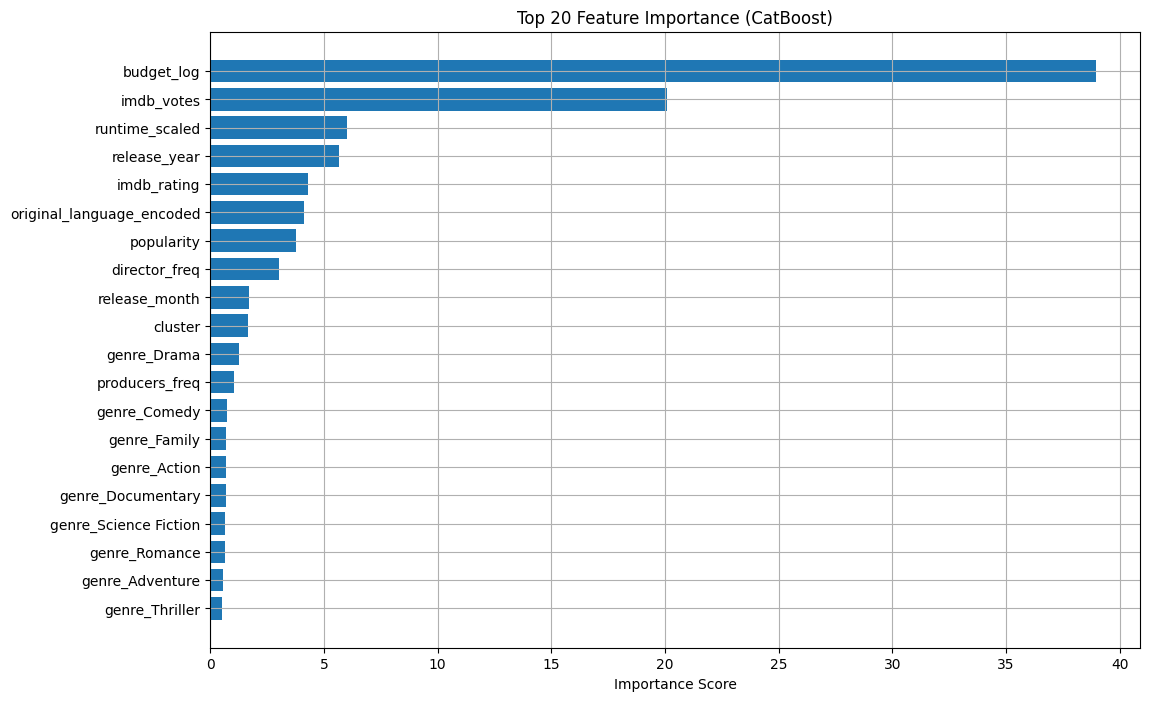

In [ ]:
# Feature Importance
feature_importance = final_model.get_feature_importance()
feature_names = X.columns

# Plot
plt.figure(figsize=(12, 8))
sorted_idx = np.argsort(feature_importance)[::-1]
plt.barh(feature_names[sorted_idx][:20][::-1], feature_importance[sorted_idx][:20][::-1])
plt.xlabel("Importance Score")
plt.title("Top 20 Feature Importance (CatBoost)")
plt.grid(True)
plt.show()

In [ ]:
# Visualization of CatBoost Tree
from catboost import CatBoostRegressor, Pool, cv, CatBoostClassifier, CatBoost

# Visualization 1 tree
final_model.plot_tree(
    tree_idx=0,
    pool=X_train,
    figsize=(20, 10)
)

# 💸 Budget Prediction

In [ ]:
import pandas as pd
import numpy as np
import optuna
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from catboost import CatBoostRegressor
import joblib
from google.colab import files

df = pd.read_csv('/content/WithClusterFinal.csv')

# --------------------------------------------------------------------------------
# Features
features = [
    'runtime',
    'original_language_encoded',
    'release_year',
    'producers_freq',
    'director_freq',
    'cluster'
]

genre_cols = [col for col in df.columns if col.startswith('genre_')]
features += genre_cols

X = df[features]
y = df['budget']

# --------------------------------------------------------------------------------
# Optuna Objective with Cross-validation
def objective(trial):
    params = {
        'iterations': 5000,
        'depth': trial.suggest_int('depth', 6, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1.0, 10.0),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 1.0),
        'random_strength': trial.suggest_float('random_strength', 1, 20),
        'loss_function': 'MAE',
        'eval_metric': 'RMSE',
        'early_stopping_rounds': 100,
        'verbose': 0,
        'random_seed': 42
    }

    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    maes = []

    for train_idx, val_idx in kf.split(X):
        X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
        y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]

        model = CatBoostRegressor(**params)
        model.fit(X_train_fold, y_train_fold, eval_set=(X_val_fold, y_val_fold))

        y_pred = model.predict(X_val_fold)
        mae = mean_absolute_error(y_val_fold, y_pred)
        maes.append(mae)

    return np.mean(maes)

# --------------------------------------------------------------------------------
#  Run Optuna Study
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=150)

print("\n=== Best Hyperparameters ===")
print(study.best_params)

# --------------------------------------------------------------------------------
#  Train Final Model with Best Parameters
final_model = CatBoostRegressor(
    iterations=5000,
    depth=study.best_params['depth'],
    learning_rate=study.best_params['learning_rate'],
    l2_leaf_reg=study.best_params['l2_leaf_reg'],
    bagging_temperature=study.best_params['bagging_temperature'],
    random_strength=study.best_params['random_strength'],
    loss_function='MAE',
    eval_metric='RMSE',
    early_stopping_rounds=100,
    random_seed=42,
    verbose=0
)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

final_model.fit(X_train, y_train, eval_set=(X_test, y_test))

# --------------------------------------------------------------------------------
# Evaluate
y_pred = final_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n=== Final Test Set Evaluation ===")
print(f"MAE : {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")
print(f"R²  : {r2:.4f}")

# --------------------------------------------------------------------------------
#  Save Model
joblib.dump(final_model, 'budget_prediction_model.pkl')
files.download('budget_prediction_model.pkl')

[I 2025-04-26 20:34:40,848] A new study created in memory with name: no-name-e4307c8d-15a8-4b9d-b077-e19f14b287c1
[I 2025-04-26 20:36:04,020] Trial 0 finished with value: 11380079.264002744 and parameters: {'depth': 10, 'learning_rate': 0.08538042260585846, 'l2_leaf_reg': 7.302997111322639, 'bagging_temperature': 0.7060679810040617, 'random_strength': 4.946752437731075}. Best is trial 0 with value: 11380079.264002744.
[I 2025-04-26 20:36:22,168] Trial 1 finished with value: 11676362.778339487 and parameters: {'depth': 8, 'learning_rate': 0.24459163353203212, 'l2_leaf_reg': 8.2024041712353, 'bagging_temperature': 0.13022365173656203, 'random_strength': 12.367048672939044}. Best is trial 0 with value: 11380079.264002744.
[I 2025-04-26 20:37:43,729] Trial 2 finished with value: 11353646.993596852 and parameters: {'depth': 10, 'learning_rate': 0.08050624900887296, 'l2_leaf_reg': 3.1495702475321274, 'bagging_temperature': 0.7845194632114226, 'random_strength': 3.1739535501914906}. Best is t


=== Best Hyperparameters ===
{'depth': 10, 'learning_rate': 0.015940650513688252, 'l2_leaf_reg': 9.732600716860034, 'bagging_temperature': 0.7247290014384211, 'random_strength': 6.739212404294562}

=== Final Test Set Evaluation ===
MAE : 11,848,326.21
RMSE: 23,095,224.05
R²  : 0.6232


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

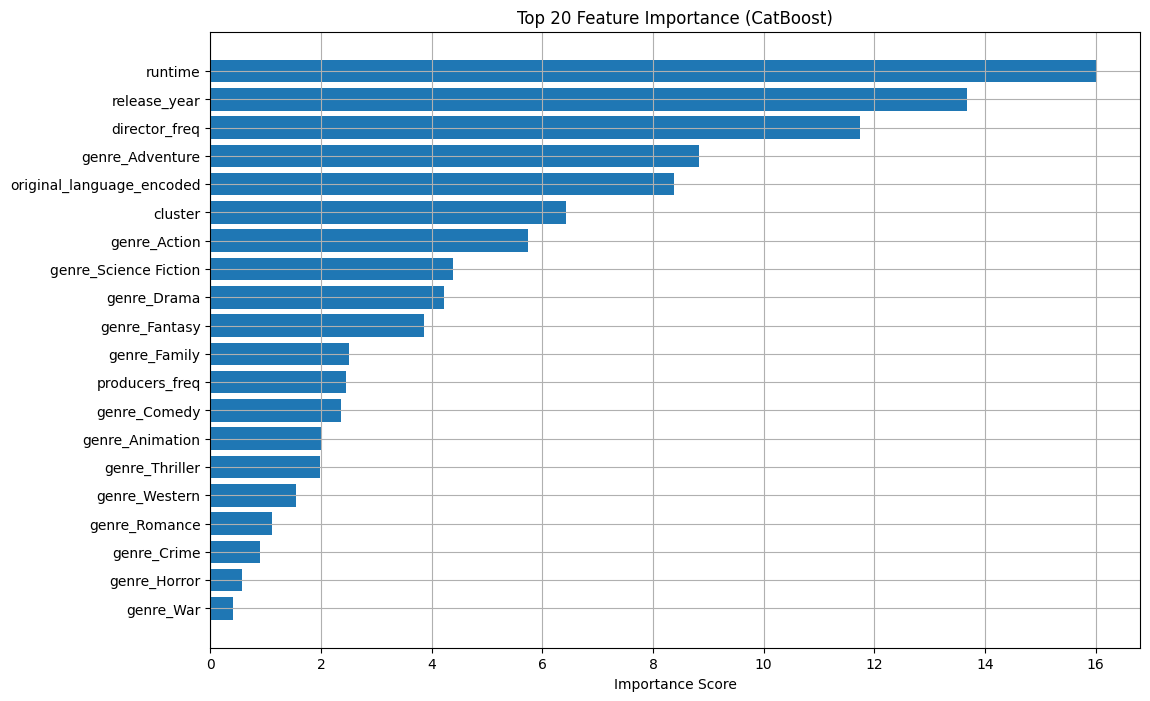

In [ ]:
# Feature Importance
feature_importance = final_model.get_feature_importance()
feature_names = X.columns

# Plot
plt.figure(figsize=(12, 8))
sorted_idx = np.argsort(feature_importance)[::-1]
plt.barh(feature_names[sorted_idx][:20][::-1], feature_importance[sorted_idx][:20][::-1])
plt.xlabel("Importance Score")
plt.title("Top 20 Feature Importance (CatBoost)")
plt.grid(True)
plt.show()

In [ ]:
# Visualization of CatBoost Tree
from catboost import CatBoostRegressor, Pool, cv, CatBoostClassifier, CatBoost

# Visualization 1 tree
final_model.plot_tree(
    tree_idx=0,
    pool=X_train,
)

# Discussion

**Performance of Revenue and Budget Prediction Models**

The CatBoost model performed well, with a high R-squared value indicating a strong fit to the data. Budget, release year, and genre were significant predictors. Action and Adventure genres consistently generated higher revenues, while Horror and Romance showed high ROI despite smaller budgets, suggesting that low-budget genres can also be profitable. Hyperparameter tuning using Optuna and cross-validation contributed to improved model performance and robustness.

**Trend Analysis by Genre**

The feature importance analysis revealed that genre and budget played pivotal roles in predicting revenue. Over the years, revenue trends showed significant growth, particularly from 2010-2020. However, a decline followed after 2020, likely due to the COVID-19 pandemic.

- Action and Adventure genres were the top contributors to high revenue.
- The revenue surge during 2010-2020 was followed by a noticeable drop after 2020.

# Conclusion

**Summary of Findings**

This project aimed to explore how data science and machine learning can provide meaningful insights into the film industry. We focused on four main objectives: identifying genre trends, estimating production budgets, predicting movie revenue, and analyzing audience reception and creator impact. The approach combined data cleaning, exploratory analysis, clustering, and predictive modeling to uncover both patterns and practical tools for decision-making.

1.	**Data Preparation & Exploration**

A critical first step in our project was the cleaning and preparation of a complex and multi-dimensional movie dataset. We removed outliers, standardized numerical features, and transformed multi-label genre fields into multi-hot encoded vectors. Additional categorical variables—such as language, director, and producer—were encoded to be usable in modeling.

We then conducted exploratory data analysis (EDA) to understand patterns in the data. Visualizations such as bar charts, line plots, and scatter plots helped us uncover genre-based revenue trends, common runtime distributions, and patterns in audience ratings and vote counts. This phase guided both modeling decisions and hypothesis formation for further analysis.


---


2.	**Modeling and Prediction**



After establishing a strong understanding of the data, we developed models to predict key financial outcomes. We used CatBoostRegressor for both budget and revenue prediction, optimizing hyperparameters with Optuna and validating performance using K-Fold Cross Validation. We also applied K-Means clustering to group similar films, using cluster labels as additional features in our models.

These models demonstrated strong predictive performance and confirmed that features such as genre, budget, runtime, and creator data can effectively estimate production cost and expected revenue.


  - **Insights and Interpretations**

  Beyond prediction, the project revealed broader industry insights. Genre-based analysis showed which types of films tend to generate higher revenue or ratings. Clustering helped uncover film archetypes beyond basic genre categories. Audience analysis revealed that certain genres consistently attract higher vote counts or ratings, while director and writer frequency analysis identified high-impact creators.

  Although we did not implement formal time-series forecasting models, our year-over-year revenue and genre trend visualizations provided a valuable perspective on the shifting landscape of audience preferences.

  - **Summary of Outcome**

  The models developed in this project achieved good predictive accuracy and revealed key drivers of film success. Cluster analysis and trend visualization provided deeper industry understanding, while EDA uncovered practical patterns in genre profitability, audience engagement, and budget allocation. These outcomes not only validate the data-driven approach but also equip producers and investors with valuable insights for strategic decision-making.


---


**Final Reflections**

This project highlights the power of combining data engineering, statistical thinking, and machine learning to generate actionable insights. While the models provide quantitative predictions, the broader analysis supports a deeper understanding of creative and commercial dynamics in film.

Future extensions could include return-on-investment (ROI) modeling, deeper creator profiling, or platform-specific distribution analysis. Nevertheless, this work lays a solid foundation for using data-driven methods to support content planning, investment strategy, and production design in the entertainment industry.